Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

## 1. Implementación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import unicodedata
import re
import urllib.request
from PIL import Image
pd.set_option('display.max.column',None)

In [ ]:
import sys 
import os  # obtener el path del jupyter tenemos esto 
root_path = os.path.dirname(os.getcwd())  
root_path  
sys.path.append(root_path)  
sys.path
print('.')

# Importar la clase AutoPlot desde mi_plot.py
from mi_plot import AutoPlot

# Usar la clase
autoplot = AutoPlot()

.


ModuleNotFoundError: No module named 'mi_plot'

In [5]:
df=pd.read_csv('data/train.csv')

In [6]:
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [7]:
df.shape

(5597, 22)

In [8]:
df.info

<bound method DataFrame.info of         ID  col1   col2  col3  col4   col5  col6  col7  col8  col9  col10  \
0     4995  0.02  26.80  0.09  1.35  0.060  0.09  0.09  1.97  1.48   0.00   
1     1709  1.13   3.95  0.32  3.95  0.030  4.66  0.56  1.89  1.36   0.82   
2     7825  0.07   8.05  0.04  0.14  0.040  0.06  0.06  0.05  0.00   0.00   
3     6918  0.09  26.40  0.03  0.92  0.090  0.57  0.00  0.36  0.03   0.23   
4        5  0.94  14.47  0.03  2.88  0.003  0.80  0.43  1.38  0.11   0.67   
...    ...   ...    ...   ...   ...    ...   ...   ...   ...   ...    ...   
5592  3048  0.01   8.92  0.20  4.88  0.050  0.36  0.09  0.54  0.14   0.27   
5593  2130  0.09   1.36  0.04  3.45  0.003  3.42  0.03  1.39  1.12   0.10   
5594  5005  0.10   4.95  0.01  0.25  0.040  0.09  0.10  1.88  0.33   0.00   
5595  2125  0.05  23.18  0.04  3.65  0.001  4.43  0.63  1.94  1.27   0.08   
5596  3294  0.09  10.81  0.69  2.67  0.060  5.97  0.02  1.15  0.53   0.66   

      col11  col12  col13  col14  col15  co

In [9]:
df.dtypes

ID          int64
col1      float64
col2      float64
col3      float64
col4      float64
col5      float64
col6      float64
col7      float64
col8      float64
col9      float64
col10     float64
col11     float64
col12     float64
col13     float64
col14     float64
col15     float64
col16     float64
col17     float64
col18     float64
col19     float64
col20     float64
target      int64
dtype: object

In [10]:
df.isnull().sum()

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

In [11]:
df['target'].unique()

array([0, 1])

In [15]:
# Distribución en porcentaje de la variable objetivo
df['target'].value_counts(normalize=True) * 100


target
0    88.565303
1    11.434697
Name: proportion, dtype: float64

In [12]:
df.describe(exclude='object').round(2)

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00
mean,3962.91,0.67,14.44,0.16,1.58,0.04,2.21,0.25,0.81,0.77,0.32,0.33,0.10,9.82,1.33,0.01,16.62,2.93,0.05,0.15,0.04,0.11
std,2311.13,1.27,8.85,0.25,1.22,0.04,2.58,0.27,0.65,0.44,0.33,0.38,0.06,5.58,0.57,0.00,17.73,2.33,0.03,0.14,0.03,0.32
min,0.00,0.00,-0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1963.00,0.04,6.85,0.03,0.55,0.01,0.10,0.05,0.09,0.40,0.00,0.00,0.05,4.94,1.01,0.00,2.22,0.82,0.02,0.04,0.02,0.00
50%,3922.00,0.07,14.39,0.05,1.21,0.04,0.55,0.09,0.75,0.76,0.23,0.01,0.10,9.86,1.42,0.00,7.84,2.43,0.05,0.08,0.05,0.00
75%,5960.00,0.29,22.26,0.10,2.51,0.07,4.33,0.45,1.39,1.16,0.61,0.70,0.15,14.69,1.76,0.01,29.98,4.67,0.07,0.25,0.07,0.00
max,7993.00,5.05,29.84,1.05,4.94,0.13,8.66,0.90,2.00,1.50,1.00,1.00,0.20,19.82,2.89,0.01,60.01,7.99,0.10,0.50,0.09,1.00


In [13]:
df[df.duplicated()]

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target


## Resumen del Análisis Exploratorio de Datos (EDA)
1. Tipo de Datos:

- Todas las columnas en el dataset son de tipo numérico (int o float), lo que facilita el análisis y la aplicación de modelos de Machine Learning sin necesidad de conversiones adicionales.

2. Ausencia de Problemas Comunes:

- No se encontraron valores nulos ni duplicados en el conjunto de datos, lo cual garantiza que no se necesiten tratamientos previos relacionados con datos faltantes o registros repetidos.

3. Variable Objetivo:

- La variable objetivo target es categórica, con valores 0 y 1, lo que indica que estamos trabajando en un problema de clasificación binaria.

4. Descripción General de las Características:

- Anomalías y Puntos de Interés:
- Algunas columnas, como `col1` y `col5`, tienen una desviación estándar alta, lo que indica que los valores están dispersos. Esto puede ser una señal de que la variable es muy heterogénea o tiene una gran variabilidad.
- En la columna `col2`, el rango entre el valor mínimo y el máximo es bastante amplio, lo que sugiere que puede haber outliers o valores atípicos que necesitan ser investigados más a fondo.
- `col11` hasta `col14` tienen mínimos de 0 y presentan una gran diferencia entre el 25% y el 75%. Esto podría indicar que los valores se concentran en torno a 0, lo que puede hacer que estas características no contribuyan de manera significativa al modelo.

5. Distribución de los Datos:

Los valores de las características están dentro de rangos esperados, pero algunas columnas presentan valores atípicos (outliers) que podrían requerir una revisión más profunda para asegurar que no afecten el rendimiento del modelo.

6. Columna Objetivo:

- La distribución de las clases en la variable target muestra una clara desproporción. Aproximadamente el 88.57% de las muestras pertenecen a la clase 0, mientras que solo el 11.43% corresponde a la clase 1. Esta desbalanceo significativo puede generar un sesgo en los modelos de clasificación, ya que el modelo podría predecir la clase mayoritaria (en este caso, 0) de manera excesiva, afectando la capacidad de identificar correctamente la clase minoritaria (1).

## 2. Revisión de Outliers

ValueError: num must be an integer with 1 <= num <= 20, not 21

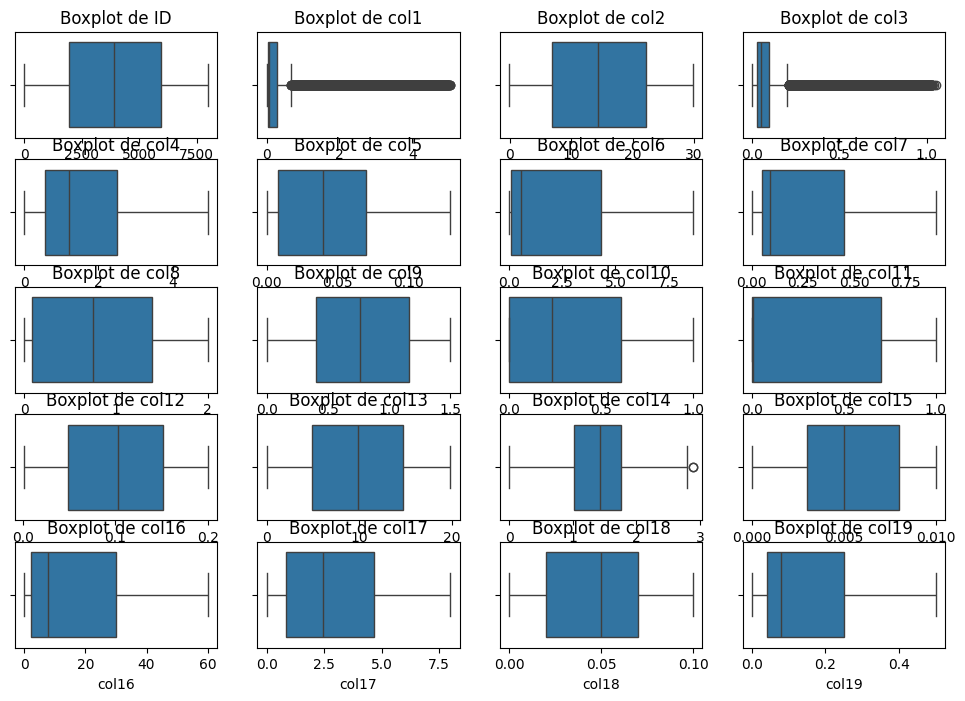